In [1]:
import pandas as pd

train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")

pd.options.display.max_columns = 100

holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [3]:
# Create a function to run the functions copied in above on a specific df
def process_df(a_df):
    '''
    a_df is a dataframe
    '''
    a_df = process_missing(a_df)
    a_df = process_age(a_df)
    a_df = process_fare(a_df)
    a_df = process_titles(a_df)
    a_df = process_cabin(a_df)
    columns = ["Age_categories", "Fare_categories", "Title", "Cabin_type", "Sex"]
    for col in columns:
        a_df = create_dummies(a_df, col)
    return a_df

# Modify the training and test sets
train = process_df(train)
holdout = process_df(holdout)

holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories,Fare_categories,Title,Cabin_type,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Fare_categories_0-12,Fare_categories_12-50,Fare_categories_50-100,Fare_categories_100+,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_Unknown,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Young Adult,0-12,Mr,Unknown,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Adult,0-12,Mrs,Unknown,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Senior,0-12,Mr,Unknown,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Young Adult,0-12,Mr,Unknown,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Young Adult,12-50,Mrs,Unknown,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 43 columns):
PassengerId                   891 non-null int64
Survived                      891 non-null int64
Pclass                        891 non-null int64
Name                          891 non-null object
Sex                           891 non-null object
Age                           891 non-null float64
SibSp                         891 non-null int64
Parch                         891 non-null int64
Ticket                        891 non-null object
Fare                          891 non-null float64
Embarked                      891 non-null object
Age_categories                891 non-null category
Fare_categories               891 non-null category
Title                         891 non-null object
Cabin_type                    891 non-null object
Age_categories_Missing        891 non-null uint8
Age_categories_Infant         891 non-null uint8
Age_categories_Child          891 non-null uin

In [5]:
train["SibSp"].value_counts(normalize = True).sort_index()

0    0.682379
1    0.234568
2    0.031425
3    0.017957
4    0.020202
5    0.005612
8    0.007856
Name: SibSp, dtype: float64

In [6]:
train["Parch"].value_counts(normalize = True).sort_index()

0    0.760943
1    0.132435
2    0.089787
3    0.005612
4    0.004489
5    0.005612
6    0.001122
Name: Parch, dtype: float64

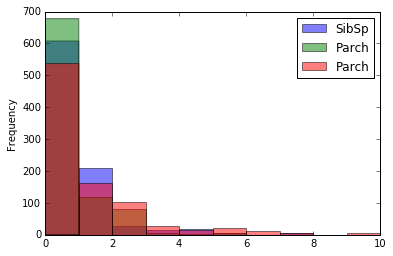

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

train["SibSp"].plot.hist(alpha = 0.5, label = "SibSp", bins = 8)
train["Parch"].plot.hist(alpha = 0.5, label = "Parch", bins = 6)
sum_column = train["SibSp"] + train["Parch"]
sum_column.plot.hist(alpha = 0.5, label = "Parch", bins = 10)
plt.legend()
plt.show()

In [8]:
trial = train[["SibSp", "Parch", "Survived"]].copy()
trial["sum"] = trial["SibSp"] + trial["Parch"]

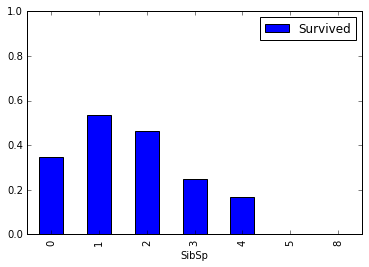

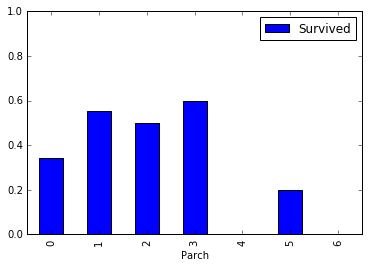

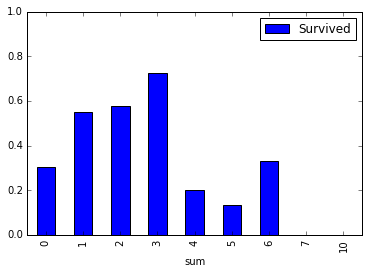

In [9]:
# Use pivot table to check the difference in survival for all values
for col in ["SibSp", "Parch", "sum"]:
    pivot = trial.pivot_table(index = col,values = "Survived")
    pivot.plot.bar(ylim = (0, 1))
    plt.show()

All the distributions of SibSp, Parch and their sum are skewed right, but the distributions for the survival rate for different values in these three columns are different, they are less skewed right and lesser people without any SibSp or/and Parch survived.

In [14]:
# Write a function to determine if the passenger has a family menmber
def process_fam(a_df):
    '''
    a_df is a dataframe
    '''
    a_df["isalone"] = 0
    a_df["sum"] = a_df["SibSp"] + a_df["Parch"]
    a_df.loc[(a_df["sum"] == 0),"isalone"] = 1
    a_df.drop("sum", axis = 1, inplace = True)
    return a_df

train = process_fam(train)
holdout = process_fam(holdout)


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories,Fare_categories,Title,Cabin_type,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Fare_categories_0-12,Fare_categories_12-50,Fare_categories_50-100,Fare_categories_100+,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male,isalone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult,0-12,Mr,Unknown,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,50-100,Mrs,C,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,0-12,Miss,Unknown,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult,50-100,Mrs,C,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult,0-12,Mr,Unknown,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


In [15]:
# Use RFE to select the best-performing features
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(a_df):
    '''
    a_df is a dataframe
    '''
    import numpy as np
    a_df = a_df.select_dtypes(np.number)
    a_df = a_df.dropna(axis = 1)
    
    all_X = a_df.drop(["PassengerId", "Survived"], axis = 1)
    all_y = a_df["Survived"]
    
    rfc = RandomForestClassifier(random_state = 1)
    rfe = RFECV(rfc, cv = 10)
    rfe.fit(all_X, all_y)
    best_cols = all_X.columns[rfe.support_]
    print(all_X.columns[rfe.support_])
    return best_cols
    
best_cols = select_features(train)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Young Adult',
       'Fare_categories_12-50', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female',
       'Sex_male', 'isalone'],
      dtype='object')


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/__init__.py:54: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [16]:
# Tune the model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(a_df, features_list):
    '''
    a_df is a dataframe, features_list is a list of features
    '''
    all_X = a_df[features_list]
    all_y = a_df["Survived"]
    models_selection = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]
    
    for model in models_selection:
        print(model["name"])
        gridsearch = GridSearchCV(model["estimator"], param_grid = model["hyperparameters"], cv = 10)
        gridsearch.fit(all_X, all_y)
        model["opt_params"] = gridsearch.best_params_
        model["opt_accuracy"] = gridsearch.best_score_
        model["best_estimator"] = gridsearch.best_estimator_
        print(model["opt_params"], "\n", model["opt_accuracy"], "\n")
        
    return models_selection

selections = select_model(train, best_cols)

LogisticRegression
{'solver': 'liblinear'} 
 0.8204264870931538 

KNeighborsClassifier
{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'} 
 0.7755331088664422 

RandomForestClassifier
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 4, 'max_features': 'log2', 'min_samples_split': 5} 
 0.8294051627384961 



In [18]:
# Write a function to save the results
def save_submission_file(model, cols_list, output = "sub.csv"):
    '''
    model is a trained model, cols_list is a list of feature columns
    '''
    holdout_features = holdout[cols_list]
    predictions = model.predict(holdout_features)
    
    ids = holdout["PassengerId"]
    submission_dict = {"PassengerId":ids, "Survived":predictions}
    submission_df = pd.DataFrame(submission_dict)
    submission_df.to_csv(output, index = False)

model_selected = selections[2]["best_estimator"]
save_submission_file(model_selected, best_cols)